### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pylab
from statsmodels.regression.linear_model import OLS

### A linear regression model is usable in practice only if the model conform to this 5 assumptions.

        Linear relationship
        Normality
        No Multicollinearity
        No Auto-correlation
        Homoscedasticity

### Importing the Encoded Dataset

In [2]:
data = pd.read_csv('Metro-Interstate-Traffic-Volume-encoded.csv')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


## Scaling the data

In [4]:
stdscale = StandardScaler()

In [5]:
data1 = stdscale.fit_transform(data)

In [6]:
data1 = pd.DataFrame(data1,columns=data.columns)

In [7]:
X = data1.drop('traffic_volume',axis=1)
Y = data1['traffic_volume']

## Fitting with the OLS model

In [8]:
model = sm.OLS(Y,X).fit()

In [9]:
fittedvals = model.fittedvalues
residuals =model.resid

In [10]:
rsq = model.rsquared
adj_rsq = model.rsquared_adj
print('R Squared :',round(rsq,4))
print('Adjusted R Squared :',round(adj_rsq,4))

R Squared : 0.138
Adjusted R Squared : 0.1378


# Validating all the assumptions

## 1.) Linear Relationship

It is the relationship between the independent variables and residuals which has to be linear

### Evaluation Plot

Residual Plot is used to evaluate the linearity of the data

### Test of Linearity

Rainbow Test

     Null Hypothesis      - the data is  linear
     Alternate Hypothesis - the data is not linear
 
     p value > 0.05 - Accept the Null
     p value < 0.05 - Reject the Null

In [11]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [12]:
stat = linear_rainbow(model)
stat

(1.0200604102218658, 0.06158934737672493)

In [13]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0616  > 0.05. So Rejecting the Null


From p value we can able to say that the data is linear 

## 2.) Normality

All variables should be multivariate normal

### Evaluation Plot

Q-Q Plot -- Normality

In [14]:
st_residual = model.get_influence().resid_studentized_internal

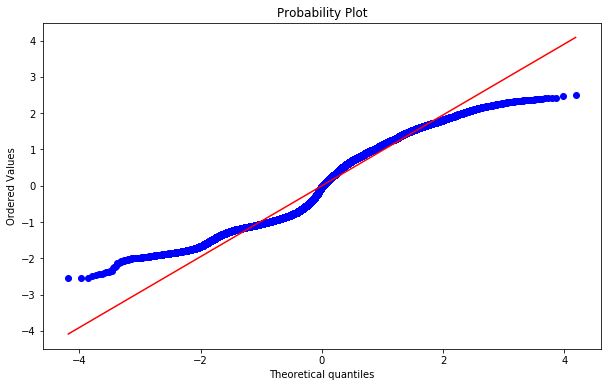

In [15]:
plt.figure(figsize=(10,6))
stats.probplot(st_residual,dist='norm',plot=pylab)
plt.show()

### Test of Normality

 Shapiro Test
 
     Null Hypothesis      - the data is following the Guassian curve
     Alternate Hypothesis - the data is not following the Guassian curve

In [16]:
from scipy.stats import shapiro

In [17]:
stat = shapiro(st_residual)
stat

(0.9548865556716919, 0.0)

In [18]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 0.0  < 0.05. So Accepting the Null


# 3.) Multicollinearity

There should be no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

### Test of Multicollinearity

 Variance Inflation Factor
 
     VIF Value = 1       : No Correlation
     VIF Value < 5       : Moderate
     VIF Value > 5, < 10 : High
     VIF Value > 10      : Very High   should drop the variable

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
for i in range(0,len(X.columns)):
    print(data.columns[i] ,'\t', variance_inflation_factor(X.values,i))

holiday 	 1.0008701999409546
temp 	 1.1292345297264268
rain_1h 	 1.048341417573125
snow_1h 	 1.0029057594975943
Year 	 1.087449971012376
Month 	 1.1020678943916875
Day 	 1.0025456066419618
Hour 	 1.0184403035686658
weather_main 	 1.0659016927493998
weather_description 	 1.0425453056746983


There is no Correlation between the features all the VIF values are within 5 which indicates there is no multicollinearity

# 4.) AutoCorrelation

Autocorrelation occurs when the residuals are not independent from each other.There should be no autocorrelation

### Test of AutoCorrelation

Durbin Watson Test

    Null Hypothesis - no serial correlation
    Alternate Hypothesis - Serial correlation
    values = 0 +ve correlation
           = 2 no correlation
           = 4 -ve correlation

In [21]:
from  statsmodels.stats.stattools import durbin_watson

In [22]:
stat =durbin_watson(residuals)
stat

0.22868164695348905

In [23]:
if stat != 2:
    print('The p value is',round(stat,4),' != 2. So Rejecting the Null')
else:
    print('The p value is',round(stat,4),' == 2. So Accepting the Null')

The p value is 0.2287  != 2. So Rejecting the Null


There is positive correlation in the residuals

# 5.) Heteroscedasticity 

The residuals should be equal across the regression line

### Evaluation Plot

Scale Location Plot - Used to evaluate Heteroscadaticity

### Test of Heteroscedasticity

Goldfend Quandt test

         Null Hypothesis      - the data is homoscedastic(uniform variance)
         Alternate Hypothesis - the data is heteroscedastic(unequal variance)

In [24]:
stat = het_goldfeldquandt(Y,model.model.exog)
stat

(0.946386492580038, 0.9999904950887288, 'increasing')

In [25]:
if stat[1] > 0.05:
    print('The p value is',round(stat[1],4),' > 0.05. So Rejecting the Null')
else:
    print('The p value is',round(stat[1],4),' < 0.05. So Accepting the Null')

The p value is 1.0  > 0.05. So Rejecting the Null


## Inference :
    We can able to conform that the data permits 3 out of 5 linear regression assumptions.
    The residual of data has autocorrelation in it. It can be handled by centering the variables which can be done by computing the mean of each independent variable and then replacing each value with the difference between it and the mean. 
    We can handle the heteroscedasticity by transforming the dependent variable with Box-Cox transformation.
    
    
### Both the autocorrelation and heteroscedasticity in the data tells us that data is dependent on the time.So it can be a time series data also we should check whether there is any pattern or trend in the data to confirm it.